© 2021 Suzy Beeler, Griffin Chure, and Soichi Hirokawa. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT) 

This exercise was generated from a Jupyter notebook. You can download the notebook [here](forward_euler.ipynb).
___

# Objective 

In this tutorial, we will cover how to write a simple numerical integrator using the Forward Euler method to examine the dynamics of exponential growth.

# The Forward Euler Method

Differential equations are frequently encountered in a variety of quantitative models of biological systems. While there are some instances when they can be solved analytically, in many cases, their solution can only be solved analytically under specific limits or assumptions. When an analytical solution is not possible, it can be useful to obtained a numerical result.

While there are whole classes of numerically integration methods depending on the type of differential equations and conditions, in this tutorial we will examine the Forward Euler method and apply it to a bacterial growth problem. In the vignette ''Laws of Cellular Growth'', we derived a simple model for bacterial growth of size $N(t)$ as a function of time $t$

$$\frac{dN}{dt} = k N(t), \tag{1}$$

where $k$ is some growth-rate constant, then found the analytical solution. We can alternatively solve this differential equation using the Forward Euler method. Starting at some given population size $N(0) = N_0$, we evaluate Equation (1) at a discrete time step $\Delta t$ to find the population size at $N(\Delta t)$, then use the population size at $N(\Delta t)$ for the next time step $N(2 \Delta t)$, and repeat for as long as we would like. We can phrase this mathematically for any time $t$ as

$$N(t + \Delta t) = N(t) + k N(t) \Delta t .\tag{2}$$

To get an idea of Equation (2) at work, suppose we started out with 100 bacteria ($N_0=100$) in media such that the growth rate is $k=0.1$ per minute. If we take a time step $\Delta t=0.1$ minutes, we can use Equation (2) to find the  change in population after $\Delta t$ has gone by:

$$\Delta N \equiv k N(t) \Delta t = 0.1 * 100 * 0.1 = 1,\tag{3}$$

so after $\Delta t$, the population will be

$$N(\Delta t) = N_0 + k N_0 \Delta t = 100 + 1 = 101 \text{ bacteria}.\tag{4}$$

We continue to take steps forward in time and repeat the procedure and watch the bacterial population explode over time. As the total time we'd like to integrate over becomes large, it becomes obvious why using a computer is a far more attractive approach than scribbling it by hand.

A major consideration for numerical methods is choosing a sufficient step size so that the method is stable. On the one hand, step sizes too small will be computationally expensive and may take too long to complete. On the other hand, too large of a step size will create instability and may not recover the solution properly (if we are integrating exponential growth of bacterial cells, we don't want to take time steps larger than a cell division!). This latter requirement roughly describes the care that goes into applying the Courant-Friedrichs-Lewy condition and is important for many explicit time integration methods such as the Forward Euler method. 

As is often the case, the best way to learn is to do. Let's give our digits some exercise and numerically integrate this exponential growth differential equation. 

# Numerically integrating exponential growth

In [1]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# For pretty plots
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
    'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
sns.set(rc=rc)

In order to numerically integrate Equation (1), we first need to specify a few parameters, such as the initial value of $N$, the growth rate $k$, and the time step $\Delta t$.

In [2]:
# parameters for our ODE
N_0 = 1
k = 0.03 # min^-1

# parameters for our integration
dt = 0.1 # min
total_time = 120 # min

Now we can set up an array into which we can save our values of $N$ as they increase with time, with the first value in the `N_t` array being set to `N_0` as specified above.

In [3]:
# determine the number of steps that will be taken
num_steps = int(total_time/dt)

# initialize an array of length num_steps into which to store values of N
N_t = np.zeros(num_steps)
N_t[0] = N_0

Now we can actually compute the numerical integration, by looping through the `N_t` array and filling in the values of `N_t` as we go. At each time point $N(t) = N(t-\Delta t) + kN(t-\Delta t) \Delta t,$ where $t - \Delta t$ refers to the previous entry in the `N_t` array.

In [4]:
# numerically integrate by looping through N_t
for t in range(1,num_steps):
    
    # first calculate dN, using pevious N_t entry
    dN = N_t[t-1] * k * dt
    
    # update current N_t entry
    N_t[t] = N_t[t-1] + dN

And done! The numerical integration of more than a thousand time steps just happened nearly instantly, showing the immense value of using code to automate computational processes. Let's now plot the results. We currently have the $N$ values to plot, we just need to specify the $t$ values as well. 

Text(0, 0.5, 'N')

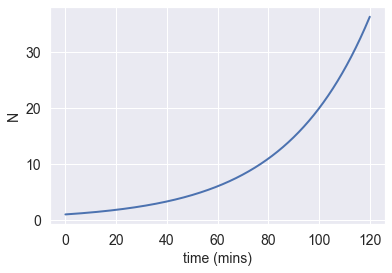

In [5]:
# make array of time values
times = np.arange(num_steps)*dt

# plot 
plt.plot(times,N_t)
plt.xlabel("time (mins)")
plt.ylabel("N")

That certainly looks exponential! Let's plot the known solution of $N(t) = N_0 e^{kt}$ on top of our numerical integration for comparison. 

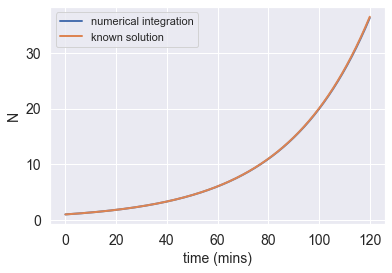

In [6]:
# compute the known solution
soln = N_0 * np.exp(k*times)

# plot both our integration and the known solution
plt.plot(times,N_t)
plt.plot(times,soln)
plt.xlabel("time (mins)")
plt.ylabel("N")
plt.legend(["numerical integration", "known solution"])

Nice! Our numerical integration and the known solution are so similar that the two lines can't be distinguished from each other in the plot above. Recall how we said that picking a sufficiently small $\Delta t$ is necessary for numerical integration to work? From here, it's worth while to see how the plot above changes for different values of `dt` and compare the result to the analytical solution to Equation (1). As `dt` increases, our numerical integration deviates more and more from the known solution, with our integration systematically underestimating the true values. This is because with exponential growth, the rate of growth is always increasing and taking too large of a time step fails to capture this increase. 